In [1]:
import requests
from googlesearch import search
#import pyttsx3                            # For audio query
#import speech_recognition as sr
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input

def listen():
    with sr.Microphone() as source:
        print('Listening')
        query = r.listen(source)
        query = r.recognize_google(query)
        print('Got it')
        return query
    
def speak(arg):
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)
    engine.say(arg)
    engine.runAndWait()

def resp(r):
    if r.lower() == 'no':
        speak('Speak again')
        r = listen()
        resp(r)
        
def find_rec(res):
    a = 0
    while a <len(res):
        try:
            s = (requests.get(res[a])).text
            ing = s.lower().index('recipeingredient') #ingredient
            ins = s.lower().index('recipeinstructions') #instruction
            required = s[ing:ins] #igredients listing
            required = required.split(',') 
            end = s[ins:].index('"recipeCategory"')
            print('Ingredient: ')      #uncomment for ingredient
            print(' ')
            [print(k) for k in required]
            
            instruct = s[ins:ins + end].split('"@type"')[1:] #recipe listing
            instruct = ''.join(instruct).split(':')
            try:
                for m in instruct:
                    if 'howto' in m.lower():
                        instruct.pop(instruct.index(m)) #recipe formatting
                instruct =''.join(instruct).split('"')
                for i in range(len(instruct)-1):
                    j = instruct[i-1].split()
                    if len(j)<=1: #and not (instruct[i].isalpha()):
                        del instruct[i-1]
            except:
                pass
            print('Recipe: ')
            print(' ')
            for k in instruct:
                if k not in ['itemListElement','url']:
                    if 'https' not in k:
                        k = k.replace('&amp;', '&')
                        print(k)
            break
            return [required, instruct]
        except:
            a+=1
            print('Trying -',a)
            
def _load_image(im):
    img = image.load_img("sample.png", target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model,im):
    
    img = _load_image(im)
    preds  = decode_predictions(_model.predict(img), top=3)[0]
    return preds

### Enter Dish name as 'query' variable 

In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import urllib
from PIL import Image

In [3]:
_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)
vgg16_model = VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
#input url in variable c

c = r'https://post.healthline.com/wp-content/uploads/2020/07/pizza-beer-1200x628-facebook-1200x628.jpg'
urllib.request.urlretrieve(c, "sample.png")
im = Image.open('sample.png')

('sample.png', <http.client.HTTPMessage at 0x1189c58be08>)

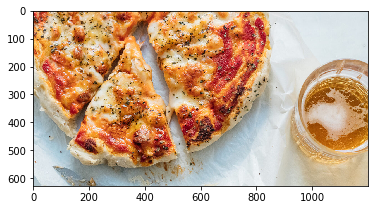

In [12]:
pred = _get_predictions(vgg16_model, im)
print(pred)
'''
#print('\nPredicting {} with {} confidence.'.format(query, pred[0][2]*100))
query = 'how to make ' + 'vegetarian pavlo'
print('Searching for "{}", Please wait......'.format(query))
res = [i for i in search(query, num_results=10)]

find_rec(res)
print('\nSearched from: \n')
for i in res:
    print(i) 
im = np.array(Image.open("sample.png"))
'''
plt.imshow(im)
